In [16]:
!pip install numpy opencv-python matplotlib

In [17]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255  85  93  22   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 113  93 226
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255]


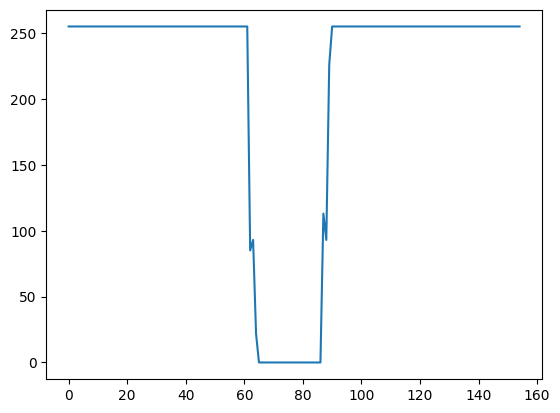

In [18]:
# Read the image file into a matrix with OpenCV
img_mat = cv.imread('wall_1.png', cv.IMREAD_GRAYSCALE)

# First row
print(img_mat[0])
plt.plot(img_mat[0])

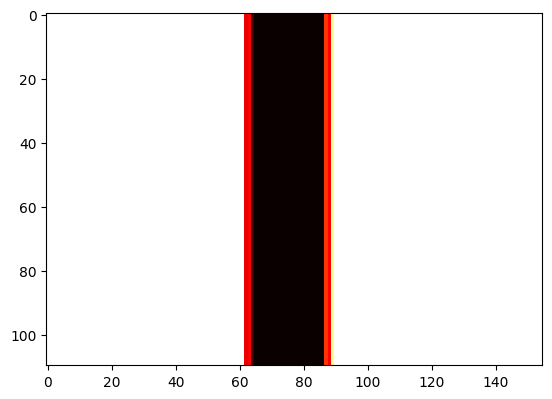

In [19]:
# Plot heatmap
plt.imshow(img_mat, cmap='hot', interpolation='nearest')

In [20]:
# Capture webcam feed and show the frames
cap = cv.VideoCapture(0)

while True:
    ret, frame = cap.read()

    # Convert to grayscale
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    cv.imshow('Webcam', frame_gray)

    if cv.waitKey(1) == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

NameError: name 'frame_gray' is not defined